In [1]:
!curl -L -o /content/wlasl-processed.zip\
  https://www.kaggle.com/api/v1/datasets/download/risangbaskoro/wlasl-processed

!unzip /content/wlasl-processed.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/videos/43596.mp4  
  inflating: /content/videos/43598.mp4  
  inflating: /content/videos/43599.mp4  
  inflating: /content/videos/43671.mp4  
  inflating: /content/videos/43672.mp4  
  inflating: /content/videos/43674.mp4  
  inflating: /content/videos/43677.mp4  
  inflating: /content/videos/43679.mp4  
  inflating: /content/videos/43680.mp4  
  inflating: /content/videos/43681.mp4  
  inflating: /content/videos/43682.mp4  
  inflating: /content/videos/43684.mp4  
  inflating: /content/videos/43689.mp4  
  inflating: /content/videos/43697.mp4  
  inflating: /content/videos/43698.mp4  
  inflating: /content/videos/43700.mp4  
  inflating: /content/videos/43703.mp4  
  inflating: /content/videos/43726.mp4  
  inflating: /content/videos/43727.mp4  
  inflating: /content/videos/43729.mp4  
  inflating: /content/videos/43730.mp4  
  inflating: /content/videos/43733.mp4  
  inflating: /content/videos/43800.mp4  
  infl

<div>
<h1>Context</h1>

WLASL is the largest video dataset for Word-Level American Sign Language (ASL) recognition, which features 2,000 common different words in ASL. We hope WLASL will facilitate the research in sign language understanding and eventually benefit the communication between deaf and hearing communities.

<h2>Content</h2>

* The WLASL_v0.3.json file contains the glossary and instances of the videos.

* Inside the videos folder, there are about 12k videos each named corresponding video_id.

<h2>Acknowledgements</h2>

* All the WLASL data is intended for academic and computational use only. No commercial usage is allowed.

* Made by Dongxu Li and Hongdong Li. Please read the WLASL paper and visit the official website and repository.

* Licensed under the Computational Use of Data Agreement (C-UDA). Please refer to the C-UDA-1.0 page for more information.

<h2>Inspiration</h2>

* How to classify word-level action recognition to text?
* What is the most accurate model to do word-level sign language recognition?

</div>

# Overview

* gloss: str, data file is structured/categorised based on sign gloss, or namely, labels.

* bbox: [int], bounding box detected using YOLOv3 of (xmin, ymin, xmax, ymax) convention. Following OpenCV convention, (0, 0) is the up-left corner.

* fps: int, frame rate (=25) used to decode the video as in the paper.

* frame_start: int, the starting frame of the gloss in the video (decoding with FPS=25), indexed from 1.

* frame_end: int, the ending frame of the gloss in the video (decoding with FPS=25). -1 indicates the gloss ends at the last frame of the video.

* instance_id: int, id of the instance in the same class/gloss.

* signer_id: int, id of the signer.

* source: str, a string identifier for the source site.

* split: str, indicates sample belongs to which subset.

* url: str, used for video downloading.

* variation_id: int, id for dialect (indexed from 0).

* video_id: str, a unique video identifier.

# Data Exploration

## Metadata

In [2]:
import json
import pandas as pd

# Load the JSON
with open('/content/WLASL_v0.3.json') as f:
    data = json.load(f)

# Flatten into a DataFrame
records = []
for entry in data:
    word = entry['gloss']
    for instance in entry['instances']:
        records.append({
            'word': word,
            'video_id': instance['video_id'],
            'url': instance['url'],
            'split': instance.get('split', ''),
            'fps': instance.get('fps', None),
            'bbox': instance.get('bbox', None),
            'signer_id': instance.get('signer_id', None),
            'source': instance.get('source', None),
            'frame_end': instance.get('frame_end', None),
            'frame_start': instance.get('frame_start', None),
            'instance_id': instance.get('instance_id', None)
        })

metadata = pd.DataFrame(records)
metadata.head(10)

,word,video_id,url,split,fps,bbox,signer_id,source,frame_end,frame_start,instance_id
0,book,69241,http://aslbricks.org/New/ASL-Videos/book.mp4,train,25,"[385, 37, 885, 720]",118,aslbrick,-1,1,0
1,book,65225,https://aslsignbank.haskins.yale.edu/dictionar...,train,25,"[190, 25, 489, 370]",90,aslsignbank,-1,1,1
2,book,68011,https://www.youtube.com/watch?v=0UsjUE-TXns,train,25,"[262, 1, 652, 480]",110,valencia-asl,-1,1,2
3,book,68208,https://www.youtube.com/watch?v=1QOYOZ3g-aY,train,25,"[123, 19, 516, 358]",113,lillybauer,60,1,3
4,book,68012,https://www.youtube.com/watch?v=aGtIHKEdCds,train,25,"[95, 0, 1180, 720]",109,valencia-asl,-1,1,4
5,book,70212,https://www.youtube.com/watch?v=hjS0dQDgbjo,val,25,"[110, 25, 274, 240]",121,northtexas,2249,2150,5
6,book,70266,https://www.youtube.com/watch?v=WGfiiDgrq1I,train,25,"[153, 38, 395, 360]",121,northtexas,3852,3732,6
7,book,07085,http://www.aslpro.com/main/b/book_english_gram...,train,25,"[16, 2, 235, 240]",49,aslpro,-1,1,7
8,book,07086,http://www.aslpro.com/main/b/book_geography.swf,train,25,"[16, 4, 239, 240]",49,aslpro,-1,1,8
9,book,07087,http://www.aslpro.com/main/b/book_geometry.swf,train,25,"[8, 1, 253, 240]",18,aslpro,-1,1,9


In [3]:
!pip install summarytools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.0 MB/s eta 0:00:00


In [4]:
from summarytools import dfSummary
dfSummary(metadata.drop(columns=['bbox']))

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,word[object],1. book2. drink3. computer4. chair5. before6. go7. who8. clothes9. candy10. deaf11. other,"40 (0.2%)35 (0.2%)30 (0.1%)26 (0.1%)26 (0.1%)26 (0.1%)25 (0.1%)25 (0.1%)24 (0.1%)23 (0.1%)20,803 (98.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA1xJREFUeJzt3MFpG2EURtE3Rjj2RkIYXELSg4tIsSlCRaQHYzyL2PFmskgWKSDcAeWcCv7FhYdgPi3btg0UbvZ+AP8PsZERGxmxkREbGbGRERsZsZERGxmxkblZluXLsix3ez+E63czM59n5tPeD+H6OaNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuZmZr7PzM+9H8L1W/yLERVnlIzYyFhXkbGuIuOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyBi9kDF7IOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzYyFhXkbGuIuOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxhklIzYyBi9kDF7IOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxhklIzYy1lVkrKvIOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjIzYy1lVkrKvIOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5FxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMsvM3M/M7d4P4ap9bNv2dnh4ePh6PB7Pe7+G67Wu68uyLN8Ox+Px/PT09HY6nd73fhTX5/X19e5yuZyfn59vDzMzp9Pp/fHx8cfeD+Nq3c/4gUBIbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmMPP7M5C9H8J1+rutw7quL5fL5Tx/PgOBf21d15eZ+fBZOIWPbdverKvI+IFARmxkxEZGbGTERkZsZMRGRmxkxEbmF8IHaTn++fMrAAAAAElFTkSuQmCC"">",0(0.0%)
2,video_id[object],1. 631902. 692413. 652254. 680115. 682086. 680127. 702128. 702669. 0708510. 0708611. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)21,073 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
3,url[object],1. https://www.youtube.com/watch?2. https://www.youtube.com/watch?3. https://www.youtube.com/watch?4. https://www.youtube.com/watch?5. https://www.youtube.com/watch?6. https://www.youtube.com/watch?7. https://www.youtube.com/watch?8. https://www.youtube.com/watch?9. https://www.youtube.com/watch?10. https://www.youtube.com/watch?11. other,"197 (0.9%)138 (0.7%)128 (0.6%)108 (0.5%)107 (0.5%)100 (0.5%)90 (0.4%)79 (0.4%)72 (0.3%)72 (0.3%)19,992 (94.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA3xJREFUeJzt3MFqGlEAhtFrkNBsRkTwYXyIPGwfwrcRcRZNyMYuanetCTT9pPacVaGbWXyM08v9uzifzwMKD7d+AP4fYiMjNjJiIyM2MmIjIzYyYiMjN

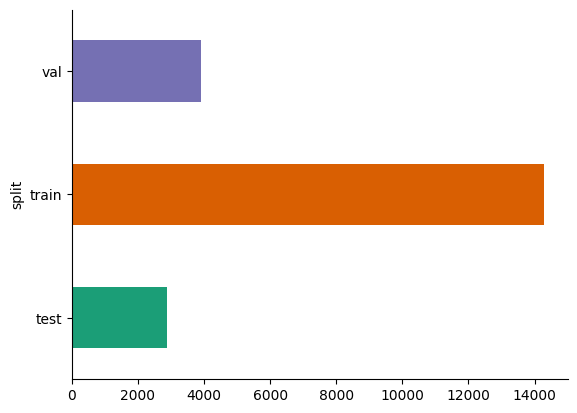

In [5]:
# @title split

from matplotlib import pyplot as plt
import seaborn as sns
metadata.groupby('split').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
metadata.shape

(21083, 11)

In [7]:
list_source = list(metadata['source'].unique())
list_source

['aslbrick',
 'aslsignbank',
 'valencia-asl',
 'lillybauer',
 'northtexas',
 'aslpro',
 'signschool',
 'startasl',
 'asldeafined',
 'aslsearch',
 'handspeak',
 'asllex',
 'signingsavvy',
 'aslu',
 'nabboud',
 'spreadthesign',
 'asl5200',
 'scott',
 'elementalasl']

## Missing data

In [8]:
with open('/content/missing.txt') as f:
    missing_ids = set(line.strip() for line in f if line.strip())

print(f'Missing id:{list(missing_ids)[:5]}')

Missing id:['58437', '01513', '58578', '10295', '68794']


## Class names and label map

In [9]:
class_names = []
class_idx = {}

with open('/content/wlasl_class_list.txt', 'r') as f:
    for line in f:
        idx, word = line.strip().split('\t')
        idx = int(idx)
        class_names.append(word)
        class_idx[word] = idx

In [10]:
print(f'# classes: {len(class_names)}')
print(f'First 5: {class_names[:5]}')

# classes: 2000
First 5: ['book', 'drink', 'computer', 'before', 'chair']


In [11]:
class_idx

{'book': 0,
 'drink': 1,
 'computer': 2,
 'before': 3,
 'chair': 4,
 'go': 5,
 'clothes': 6,
 'who': 7,
 'candy': 8,
 'cousin': 9,
 'deaf': 10,
 'fine': 11,
 'help': 12,
 'no': 13,
 'thin': 14,
 'walk': 15,
 'year': 16,
 'yes': 17,
 'all': 18,
 'black': 19,
 'cool': 20,
 'finish': 21,
 'hot': 22,
 'like': 23,
 'many': 24,
 'mother': 25,
 'now': 26,
 'orange': 27,
 'table': 28,
 'thanksgiving': 29,
 'what': 30,
 'woman': 31,
 'bed': 32,
 'blue': 33,
 'bowling': 34,
 'can': 35,
 'dog': 36,
 'family': 37,
 'fish': 38,
 'graduate': 39,
 'hat': 40,
 'hearing': 41,
 'kiss': 42,
 'language': 43,
 'later': 44,
 'man': 45,
 'shirt': 46,
 'study': 47,
 'tall': 48,
 'white': 49,
 'wrong': 50,
 'accident': 51,
 'apple': 52,
 'bird': 53,
 'change': 54,
 'color': 55,
 'corn': 56,
 'cow': 57,
 'dance': 58,
 'dark': 59,
 'doctor': 60,
 'eat': 61,
 'enjoy': 62,
 'forget': 63,
 'give': 64,
 'last': 65,
 'meet': 66,
 'pink': 67,
 'pizza': 68,
 'play': 69,
 'school': 70,
 'secretary': 71,
 'short': 72,
 '

## Duration (sec)

In [12]:
import cv2, os

def get_video_info(path):
    cap = cv2.VideoCapture(path)
    if not cap.isOpened():
        return None

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration = total_frames / fps if fps > 0 else 0
    cap.release()
    return total_frames, fps, duration

def scan_videos_to_csv(data_dir, output_csv='video_metadata.csv'):
    rows = []

    for filename in sorted(os.listdir(data_dir)):
        if filename.endswith(('.mp4', '.avi', '.mov')):
            video_path = os.path.join(data_dir, filename)
            info = get_video_info(video_path)

            if info is None:
                print(f"[SKIP] Corrupt or unreadable: {video_path}")
                continue

            total_frames, fps, duration = info
            rows.append({
                'video_path': video_path,
                'filename': filename,
                'frames': total_frames,
                'fps': fps,
                'duration_sec': duration
            })

    df = pd.DataFrame(rows)
    df.to_csv(output_csv, index=False)
    print(f"Saved metadata for {len(rows)} videos to {output_csv}")

In [13]:
scan_videos_to_csv('/content/videos')


Saved metadata for 11980 videos to video_metadata.csv


In [14]:
vid_df = pd.read_csv('video_metadata.csv')
vid_df.head()

,video_path,filename,frames,fps,duration_sec
0,/content/videos/00335.mp4,00335.mp4,58,25.000000,2.320000
1,/content/videos/00336.mp4,00336.mp4,65,30.004616,2.166333
2,/content/videos/00338.mp4,00338.mp4,72,29.970000,2.402402
3,/content/videos/00339.mp4,00339.mp4,61,29.970000,2.035369
4,/content/videos/00341.mp4,00341.mp4,84,30.331450,2.769403


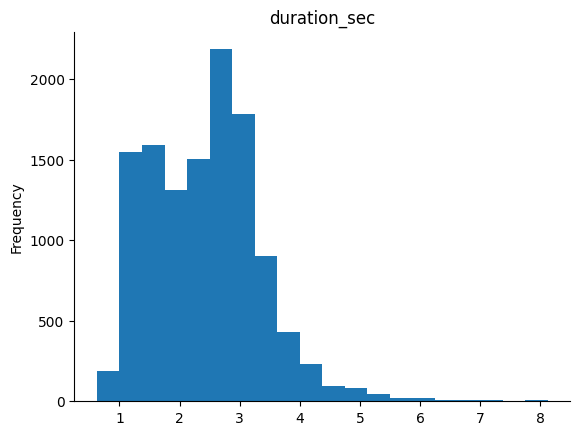

In [15]:
# @title duration_sec

from matplotlib import pyplot as plt
vid_df['duration_sec'].plot(kind='hist', bins=20, title='duration_sec')
plt.gca().spines[['top', 'right',]].set_visible(False)

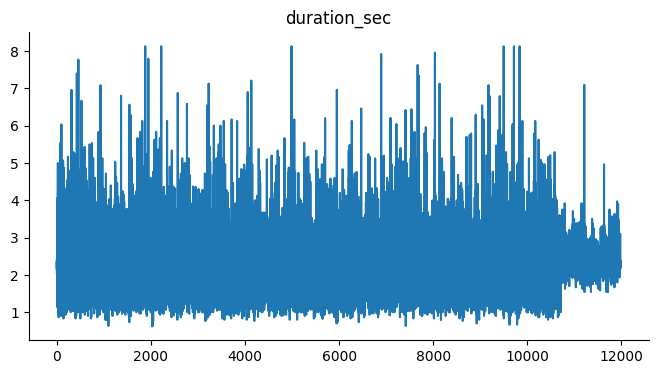

In [16]:
# @title duration_sec

from matplotlib import pyplot as plt
vid_df['duration_sec'].plot(kind='line', figsize=(8, 4), title='duration_sec')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
print(f'Duration range (in sec): [{min(vid_df["duration_sec"])}, {max(vid_df["duration_sec"])}]')

Duration range (in sec): [0.6256222222222223, 8.125]


In [18]:
print(f'FPS range: [{min(vid_df["fps"])}, {max(vid_df["fps"])}]')

FPS range: [12.0, 59.94]


In [19]:
dfSummary(vid_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,video_path[object],1. /content/videos/69547.mp42. /content/videos/00335.mp43. /content/videos/00336.mp44. /content/videos/00338.mp45. /content/videos/00339.mp46. /content/videos/00341.mp47. /content/videos/00376.mp48. /content/videos/00377.mp49. /content/videos/00381.mp410. /content/videos/00382.mp411. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)11,970 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
2,filename[object],1. 69547.mp42. 00335.mp43. 00336.mp44. 00338.mp45. 00339.mp46. 00341.mp47. 00376.mp48. 00377.mp49. 00381.mp410. 00382.mp411. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)11,970 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
3,frames[int64],Mean (sd) : 69.1 (26.6)min < med < max:15.0 < 70.0 < 233.0IQR (CV) : 41.0 (2.6),167 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAsBJREFUeJzt3T1v2kAYwPHn6gSOlxoQKWysDJU6MLL0G/TDZu2WSDCy5BtkiSI5xhYUhzd3aaJKTUl8tgtP+v/th2/4cwJ0ejBpmgpw6j4cewPAW5wdewOHGGNqIlJxXL5O03RV5H5wPCcbqjGm1u12v/m+33FZP5/PF8aY7yKSOG6B0E9IqaHmPBH9ZrPZG4/HcavVyhTb3d3dx+l0+nUwGFx4nucUahzHoTHmklhPQ2mh5j0RN5uN3e12n6vV6lWv1/uRZW0YhjVrbX00GiX9fj/M+uwoiuxkM

## Subset

In [20]:
def load_subset(subset_file):
    with open(subset_file, 'r') as f:
        data = json.load(f)

    video_ids = []
    labels = []
    frame_starts = []
    frame_ends = []
    splits = []

    for vid, meta in data.items():
        video_ids.append(vid)
        label, start, end = meta['action']
        labels.append(label)
        frame_starts.append(start)
        frame_ends.append(end)
        splits.append(meta['subset'])

    df = pd.DataFrame({
        'video_id': video_ids,
        'label': labels,
        'frame_start': frame_starts,
        'frame_end': frame_ends,
        'split': splits
    })

    return df

In [21]:
# @title nslt100
nslt100 = load_subset('/content/nslt_100.json')
nslt100.head()

,video_id,label,frame_start,frame_end,split
0,05237,77,1,55,train
1,69422,27,1,51,val
2,10899,82,1,48,train
3,10898,82,1,39,val
4,10893,82,1,50,train


In [22]:
nslt100.shape

(2038, 5)

In [23]:
# @title nslt300
nslt300 = load_subset('/content/nslt_300.json')
nslt300.head()

,video_id,label,frame_start,frame_end,split
0,05237,77,1,55,train
1,65096,182,1,75,train
2,65639,279,1,51,train
3,10112,191,1,80,train
4,55348,247,1,67,test


In [24]:
nslt300.shape

(5118, 5)

In [25]:
# @title nslt1000
nslt1000 = load_subset('/content/nslt_1000.json')
nslt1000.head()

,video_id,label,frame_start,frame_end,split
0,65097,481,1,74,train
1,32962,415,1,43,val
2,24029,208,1,28,train
3,24028,208,1,55,test
4,48027,969,1,55,train


In [26]:
nslt1000.shape

(13174, 5)

In [27]:
# @title nslt2000
nslt2000 = load_subset('/content/nslt_2000.json')
nslt2000.head()

,video_id,label,frame_start,frame_end,split
0,65097,481,1,74,train
1,35544,1164,1,68,train
2,32962,415,1,43,val
3,30173,1144,1,34,test
4,35547,1164,1,55,val


In [28]:
nslt2000.shape

(21095, 5)

# Preprocessing Metadata

## Filter Missing

In [29]:
metadata = metadata[~metadata['video_id'].isin(missing_ids)]
metadata.shape

(11980, 11)

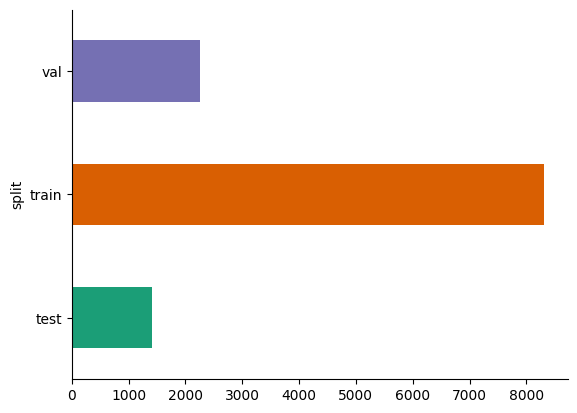

In [30]:
# @title split

from matplotlib import pyplot as plt
import seaborn as sns
metadata.groupby('split').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [31]:
filtered = pd.DataFrame(metadata[["word", "video_id", "split", "bbox", "frame_start", "frame_end"]])
filtered.reset_index(drop=True, inplace=True)
filtered.head(5)

,word,video_id,split,bbox,frame_start,frame_end
0,book,69241,train,"[385, 37, 885, 720]",1,-1
1,book,07069,train,"[462, 44, 949, 720]",1,-1
2,book,07068,train,"[234, 17, 524, 414]",1,-1
3,book,07070,train,"[131, 26, 526, 480]",1,-1
4,book,07099,val,"[162, 54, 528, 400]",1,-1


In [32]:
filtered.shape

(11980, 6)

In [33]:
dfSummary(filtered.drop(columns=['bbox']))

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,word[object],1. thin2. before3. cool4. drink5. go6. cousin7. who8. help9. computer10. tall11. other,"16 (0.1%)16 (0.1%)16 (0.1%)15 (0.1%)15 (0.1%)14 (0.1%)14 (0.1%)14 (0.1%)14 (0.1%)13 (0.1%)11,833 (98.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA1xJREFUeJzt3MFpG2EURtE3Rjj2RkIYXELSg4tIsSlCRaQHYzyL2PFmskgWKSDcAeWcCv7FhYdgPi3btg0UbvZ+AP8PsZERGxmxkREbGbGRERsZsZERGxmxkblZluXLsix3ez+E63czM59n5tPeD+H6OaNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuZmZr7PzM+9H8L1W/yLERVnlIzYyFhXkbGuIuOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyBi9kDF7IOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzYyFhXkbGuIuOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxhklIzYyBi9kDF7IOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxhklIzYy1lVkrKvIOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjIzYy1lVkrKvIOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5FxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMsvM3M/M7d4P4ap9bNv2dnh4ePh6PB7Pe7+G67Wu68uyLN8Ox+Px/PT09HY6nd73fhTX5/X19e5yuZyfn59vDzMzp9Pp/fHx8cfeD+Nq3c/4gUBIbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmMPP7M5C9H8J1+rutw7quL5fL5Tx/PgOBf21d15eZ+fBZOIWPbdverKvI+IFARmxkxEZGbGTERkZsZMRGRmxkxEbmF8IHaTn++fMrAAAAAElFTkSuQmCC"">",0(0.0%)
2,video_id[object],1. 631902. 692413. 070694. 070685. 070706. 070997. 070748. 693029. 6553910. 1771011. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)11,970 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
3,split[object],1. train2. val3. test,"8,313 (69.4%)2,253 (18.8%)1,414 (11.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAZlJREFUeJzt20GK4mAUhdGXRoquSYIILsZF9GJ7EdmNiBlUFTVJD3puSQj358dzVvDATyXiHdZ1LUj41foAXsdQVe9V9db6EJ72va7rZ+sjtjicTqc/4zgeWx/Cc5ZluQ3D8LfH4A7jOB4vl8vnNE1frY/hsfv9/nue5+P1en2rqv5iq6qapunrfD5/tD6Gp7y3PmArDwjEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiDlU/f+fVOtD+Fnvr9NhWZbbPM/H6vh/Uq9kWZZbVX23vmMLG4T+dLtBGEz5SGn1ydbtu5Ptmqyrel4IsV18XdX7QojtWq2rPPm+ID/qEiM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiMmvq7qfSHEdk3WVT0vhNjOBoEY6ypiPCAQs+fXqK9GHtptymeex092mfKZ5/GMPad85nk85AGBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZix

## Standardize the fps

In [34]:
import os
import subprocess
import concurrent.futures
from tqdm import tqdm

def convert_video(input_path, output_path, progress_bar):
    command = [
        "ffmpeg",
        "-y",
        "-i", input_path,
        "-r", "25",
        output_path
    ]
    subprocess.run(command, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

    progress_bar.update(1)

def convert_videos_to_25fps(data_dir, output_dir="videos_25fps"):
    os.makedirs(output_dir, exist_ok=True)

    video_exts = (".mp4", ".mov", ".avi", ".mkv")
    video_files = [f for f in os.listdir(data_dir) if f.lower().endswith(video_exts)]

    print(f"Found {len(video_files)} video(s) in '{data_dir}'")

    with tqdm(total=len(video_files), desc="Converting to 25 FPS") as progress_bar:
        with concurrent.futures.ThreadPoolExecutor() as executor:
            futures = []
            for filename in video_files:
                input_path = os.path.join(data_dir, filename)
                base_name = os.path.splitext(filename)[0]
                output_path = os.path.join(output_dir, f"{base_name}.mp4")

                if os.path.exists(output_path):
                    continue

                futures.append(executor.submit(convert_video, input_path, output_path, progress_bar))

            for future in concurrent.futures.as_completed(futures):
                future.result()

    print("All videos processed!")

convert_videos_to_25fps("/content/videos")

Found 11980 video(s) in '/content/videos'


Converting to 25 FPS: 100%|██████████| 11980/11980 [5:53:59<00:00,  1.77s/it]

All videos processed!


In [35]:
import shutil

# Path to the folder you want to zip
folder_path = '/content/videos_25fps'
zip_path = '/content/videos_25fps.zip'

# Zip the folder
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)

'/content/videos_25fps.zip'

In [36]:
from google.colab import files

# Download the zipped folder
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
scan_videos_to_csv('/content/videos_25fps', 'video_metadata_25fps.csv')
std_vid_df = pd.read_csv('video_metadata_25fps.csv')
std_vid_df.head()

Saved metadata for 11980 videos to video_metadata_25fps.csv


,video_path,filename,frames,fps,duration_sec
0,/content/videos_25fps/00335.mp4,00335.mp4,58,25.0,2.32
1,/content/videos_25fps/00336.mp4,00336.mp4,56,25.0,2.24
2,/content/videos_25fps/00338.mp4,00338.mp4,61,25.0,2.44
3,/content/videos_25fps/00339.mp4,00339.mp4,52,25.0,2.08
4,/content/videos_25fps/00341.mp4,00341.mp4,72,25.0,2.88


In [38]:
dfSummary(std_vid_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,video_path[object],1. /content/videos_25fps/69547.mp2. /content/videos_25fps/00335.mp3. /content/videos_25fps/00336.mp4. /content/videos_25fps/00338.mp5. /content/videos_25fps/00339.mp6. /content/videos_25fps/00341.mp7. /content/videos_25fps/00376.mp8. /content/videos_25fps/00377.mp9. /content/videos_25fps/00381.mp10. /content/videos_25fps/00382.mp11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)11,970 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
2,filename[object],1. 69547.mp42. 00335.mp43. 00336.mp44. 00338.mp45. 00339.mp46. 00341.mp47. 00376.mp48. 00377.mp49. 00381.mp410. 00382.mp411. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)11,970 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
3,frames[int64],Mean (sd) : 61.8 (23.6)min < med < max:15.0 < 63.0 < 203.0IQR (CV) : 34.0 (2.6),159 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAtJJREFUeJzt3TFP20AYgOHvahIdCXKIQMnmlaESQ0aW/oP+WNZuRcqOxD9gQzKOrbgYG+NOdKIUn8+NP+t99i+54ZV1saOzaZpGgKH7cugFAJ9xdOgFfMQYcywiU8fxsmmaJ5/rweEMNlRjzPHZ2dn3MAyXLvNZliXGmGtiHYfBhioi0zAMl1dXV0+LxaJoM5imqd1ut8s4jqciQqgjMORQRURksVgUq9Xql8PosffF4GAGH6q

In [39]:
print(f'Duration range (in sec): [{min(std_vid_df["duration_sec"])}, {max(std_vid_df["duration_sec"])}]')

Duration range (in sec): [0.6, 8.12]


## Completed metadata

In [42]:
std_vid_df['video_id'] = std_vid_df['filename'].str.replace('.mp4', '').astype(str)

completed_metadata = filtered.merge(std_vid_df[['video_id', 'video_path', 'frames', 'duration_sec']], on='video_id', how='left')
completed_metadata.head()

,word,video_id,split,bbox,frame_start,frame_end,video_path,frames,duration_sec
0,book,69241,train,"[385, 37, 885, 720]",1,-1,/content/videos_25fps/69241.mp4,64,2.56
1,book,07069,train,"[462, 44, 949, 720]",1,-1,/content/videos_25fps/07069.mp4,31,1.24
2,book,07068,train,"[234, 17, 524, 414]",1,-1,/content/videos_25fps/07068.mp4,58,2.32
3,book,07070,train,"[131, 26, 526, 480]",1,-1,/content/videos_25fps/07070.mp4,73,2.92
4,book,07099,val,"[162, 54, 528, 400]",1,-1,/content/videos_25fps/07099.mp4,74,2.96


In [43]:
completed_metadata.shape

(11980, 9)

In [44]:
completed_metadata.to_csv('metadata.csv', index=False)